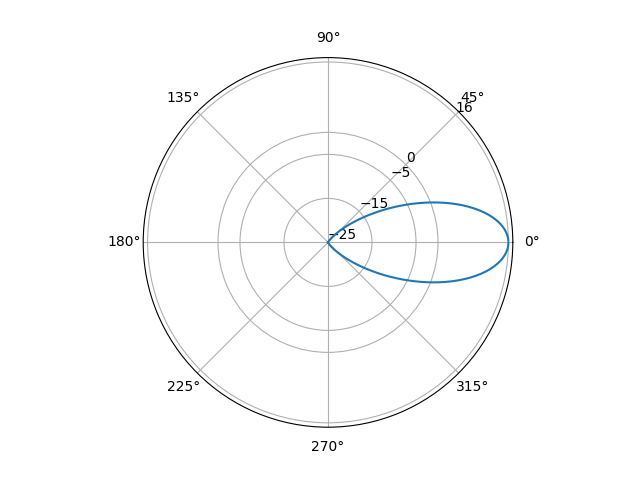

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget
from Model import Model
from BLEHardware import Transmitter, Receiver

def gain(theta, maxGain, falloff):
  g = (maxGain+25) * np.power(np.cos(theta),falloff)
  #g = np.abs(g)
  return g-25

fig = plt.figure()
ax = fig.add_subplot(projection="polar")

theta = np.arange(0,2*np.pi,0.01)[1:]
max=16
g = gain(theta,max,7)

#theta = np.where(g >= 0, theta, theta + np.pi)

ax.set_rlim(0,max+1)
ax.set_rticks([-25,-15,-5,0,max])
ax.set_rlabel_position(45)
ax.plot(theta,g)
plt.show()
